In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [2]:
# Load the dataset
file_path = './Wholesale customers data.csv'
data = pd.read_csv(file_path)

In [3]:
# Drop categorical columns (Channel and Region) for clustering
clustering_data = data.drop(['Channel', 'Region'], axis=1)

In [4]:
# Normalize the data
scaler = StandardScaler()
normalized_data = scaler.fit_transform(clustering_data)

In [5]:
# Determine the optimal number of clusters using the Elbow Method
inertia = []
k_values = range(1, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(normalized_data)
    inertia.append(kmeans.inertia_)

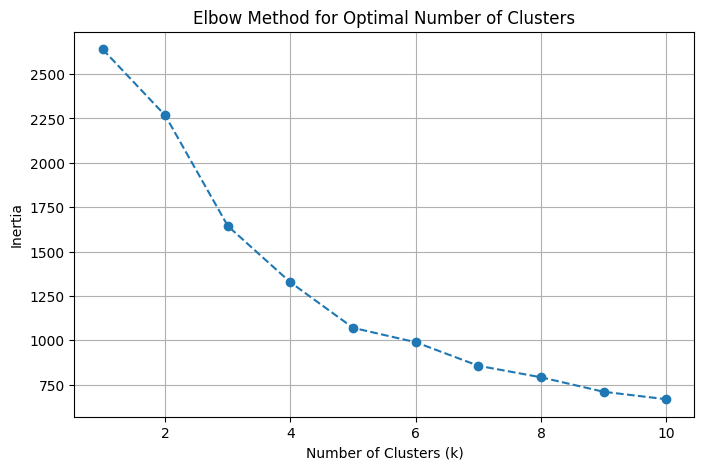

In [6]:
# Plot the Elbow curve
plt.figure(figsize=(8, 5))
plt.plot(k_values, inertia, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.grid()
plt.show()


In [7]:
# Based on the Elbow method, selecting k=5 as a reasonable number of clusters
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
cluster_labels = kmeans.fit_predict(normalized_data)

In [8]:
# Adding cluster labels to the original data for reference
data['Cluster'] = cluster_labels

In [9]:
# Visualizing the clusters using PCA (2D projection)
pca = PCA(n_components=2, random_state=42)
pca_transformed_data = pca.fit_transform(normalized_data)

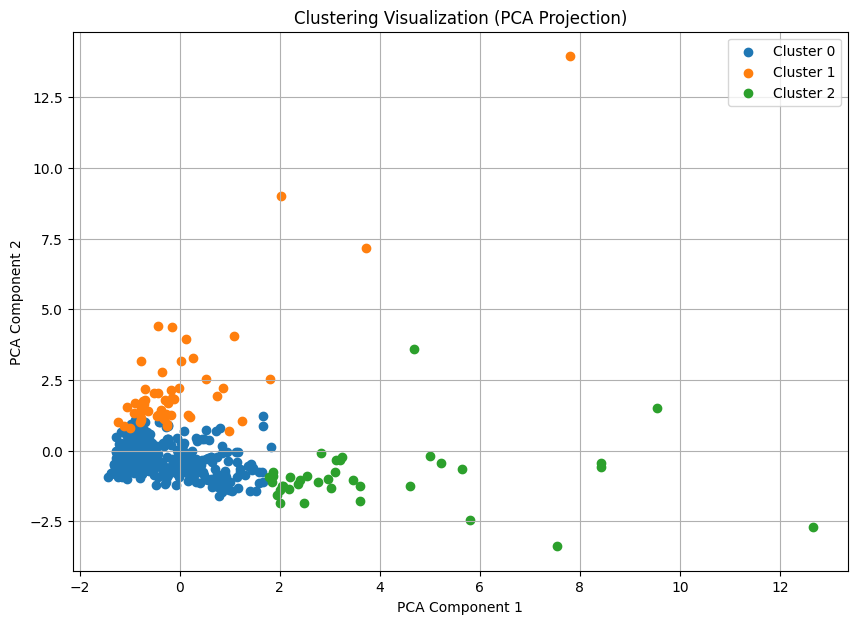

In [10]:
# Plot the clustered data in 2D
plt.figure(figsize=(10, 7))
for cluster in range(optimal_k):
    plt.scatter(
        pca_transformed_data[cluster_labels == cluster, 0],
        pca_transformed_data[cluster_labels == cluster, 1],
        label=f'Cluster {cluster}'
    )

plt.title('Clustering Visualization (PCA Projection)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()
plt.grid()
plt.show()

In [11]:
# Display the final dataset with clusters
print(data.head())

   Channel  Region  Fresh  Milk  Grocery  Frozen  Detergents_Paper  \
0        2       3  12669  9656     7561     214              2674   
1        2       3   7057  9810     9568    1762              3293   
2        2       3   6353  8808     7684    2405              3516   
3        1       3  13265  1196     4221    6404               507   
4        2       3  22615  5410     7198    3915              1777   

   Delicassen  Cluster  
0        1338        0  
1        1776        0  
2        7844        0  
3        1788        0  
4        5185        1  
